# SciKit Learn Tutorials
<hr>
### This notebook will be the space in which I work through the SciKit Learn tutorials provided by the SciKit Learn developers.

In [12]:
# Beginning with a simple supervised learning exercise on the
# iris dataset and the MNIST digits
from sklearn import datasets
from sklearn import svm
import numpy as np
iris = datasets.load_iris()
digits = datasets.load_digits()

In [2]:
# In these data sets the data for evaluation is in the .data 
# property and the ground truth or verified values are in the
# targets property.
digits.data
digits.target
# We implement a predictor class so we can use it to fit our 
# existing data and generate predictions
clf = svm.SVC(gamma=0.001, C=100.) # clf is a classifier
# To train our classifier (which is to let it learn from data)
# we pass it all our images and results except the last one
clf.fit(digits.data[:-1], digits.target[:-1])
# Now we can use the classifier we've generated to predict our
# last value
clf.predict(digits.data[-1:])


array([8])

In [16]:
digits.images[-1:]

array([[[  0.,   0.,  10.,  14.,   8.,   1.,   0.,   0.],
        [  0.,   2.,  16.,  14.,   6.,   1.,   0.,   0.],
        [  0.,   0.,  15.,  15.,   8.,  15.,   0.,   0.],
        [  0.,   0.,   5.,  16.,  16.,  10.,   0.,   0.],
        [  0.,   0.,  12.,  15.,  15.,  12.,   0.,   0.],
        [  0.,   4.,  16.,   6.,   4.,  16.,   6.,   0.],
        [  0.,   8.,  16.,  10.,   8.,  16.,   8.,   0.],
        [  0.,   1.,   8.,  12.,  14.,  12.,   1.,   0.]]])

### Statistical Learning for Scientific Data Processing
<hr/>
<p>The use of machine learning techniques with the goal of statistical inference.</p>

(150, 4)
(1797, 8, 8)


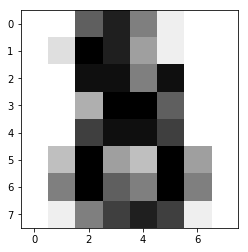

(1797, 64)


In [11]:
# 2-1
# Data needs to be a 2D matrix in order to be consumed but 
# sci-kit.
data = iris.data
# The first axis is the n_samples axis while the second is the 
# n_features axis.  In the data shape we see below we have
# 150 samples each containing 4 features.
print(data.shape)
# In some cases our data shape has a different dimensionality
# Then we have to reshape it before we can use it.
print(digits.images.shape) # We can handle an 8x8 set of features
import pylab as pl
pl.imshow(digits.images[-1],cmap=pl.cm.gray_r)
pl.show()
# So we turn an 8x8 matrix of features into a 64 feature vector
data = digits.images.reshape(digits.images.shape[0],-1)
print(data.shape)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]
[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
Model mean squared error: 2004.5676026898218
Percent of variance explained by model is 59.0%


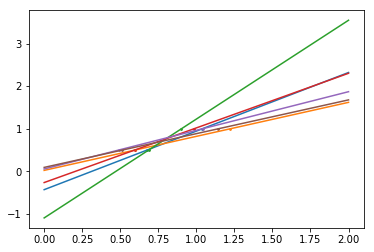

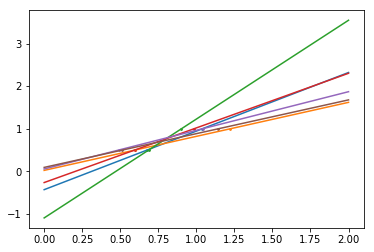

In [33]:
# 2-2: Supervised learning
# This type of learning consists of two types of predictions
# Classification (discrete) or regression (continuous).

# Nearest-neighbor is one of the simplest methods of classification.
# For a new sample of n features, find a sample in the training set
# that most closely matches the feature values and return the 
# classification value.
iris_x = iris.data
iris_y = iris.target
# Split iris data into train and test sets randomly
np.random.seed(0) # random permutation
indices = np.random.permutation(len(iris_x))
iris_x_train = iris_x[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_x_test = iris_x[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_x_train,iris_y_train)
# Estimated results from classifier data
print(knn.predict(iris_x_test))
# Actual data
print(iris_y_test) # this approach was 90% accurate...not bad..
# As the number of dimensions considered increase, the number 
# of samples needed to build an effective classifier increases
# exponentially.  Thus one of the key goals of machine learning
# is dimensionality reduction.

# 2.2.2 Linear model: from regression to sparsity
# The diabetes data set consists of 10 physiological variables
# measured on 442 patients and an indication of disease progression
# after one year.
diabetes = datasets.load_diabetes()
diabetes_x_train = diabetes.data[:-20]
diabetes_x_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
# The the task becomes predicting disease progression from the
# physiological variables using a linear model: y = b*x+e
# y = result, x = inputs, b = coefficients, e = error term
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_x_train,diabetes_y_train)
# Printing our coefficients in the b term of our linear model
print(regr.coef_)
# Mean squared error of the model
print('Model mean squared error: {}'.\
      format(np.mean((regr.predict(diabetes_x_test)-diabetes_y_test)**2)))

# Explained variabce score 0 - 1 scale
print('Percent of variance explained by model is {}%'.\
      format(round(regr.score(diabetes_x_test,diabetes_y_test),2)*100))

# If there are few data poins per dimension then noise in the
# observations dramatically increases variance.
X = np.c_[.5, 1].T
y = [.5,1]
test = np.c_[0,2].T
regr = linear_model.LinearRegression()
pl.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1)) + X
    regr.fit(this_X,y)
    pl.plot(test,regr.predict(test))
    pl.scatter(this_X,y,s=3)
    
pl.show()